# Graded Challenge 2

Muhammad Fadlil Ismail (FTDS Batch 10 Phase 0)

## Introduction

### Objective

`Melakukan penerapan turunan parsial dan perkalian matriks menggunakan library numpy.`

### Problem Statement

`Melakukan operasi turunan parsial untuk mendetekasi edge pada gambar dan perkalian matriks untuk mengolah dataset gambar.`

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Library yang digunakan adalah numpy untuk operasi turunan parsial dan operasi perkalian matriks, dan library matplotlib.pyplot untuk mengimpor dan menampilkan gambar.

## Data Loading

Uncomment dan run cell dibawah ini untuk mendownload gambar (perintah dibawah hanya berjalan di google colaboratory).

In [2]:
#!wget https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

### Load Gambar

Load gambar menggunakan perintah imread pada plt dan tampilkan dengan perintah imshow.

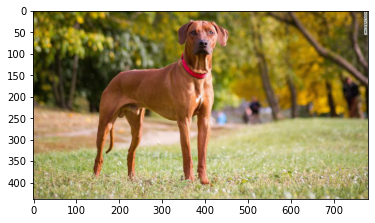

In [2]:
gambar = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')
plt.imshow(gambar)

Pada gambar terlihat seekor anjing dengan latar belakang pepohonan.

## Data Preprocessing

### Cek Tipe Gambar

In [3]:
type(gambar)

numpy.ndarray

Gambar yang di-load menggunakan plt secara otomatis tersimpan dalam bentuk numpy array

### Cek Dimensi Gambar

In [4]:
gambar.shape

(438, 780, 3)

Gambar merupakan array 3D dengan bentuk (438, 780, 3). Gambar memiliki 3 kanal warna (RGB), sehingga sebelum proses yang lebih lanjut, gambar perlu dipecah untuk tiap-tiap kanal warna.

### Split Array untuk tiap-tiap Kanal Warna

Text(0.5, 1.0, 'Gambar pada Filter B')

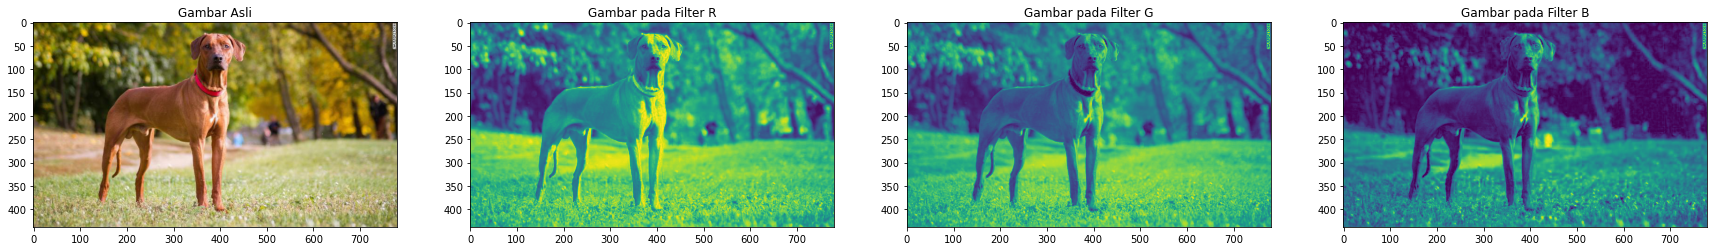

In [5]:
#Split untuk kanal Red, Green dan Blue
gambar_red = gambar[:,:,0]
gambar_green = gambar[:,:,1]
gambar_blue = gambar[:,:,2]

#Tampilkan Gambar
fig, ax = plt.subplots(ncols=4,figsize=(30,10))
ax[0].imshow(gambar)
ax[0].set_title('Gambar Asli')
ax[1].imshow(gambar_red)
ax[1].set_title('Gambar pada Filter R')
ax[2].imshow(gambar_green)
ax[2].set_title('Gambar pada Filter G')
ax[3].imshow(gambar_blue)
ax[3].set_title('Gambar pada Filter B')

Terlihat perbedaan gambar untuk tiap-tiap kanal warna, artinya gambar telah siap untuk diproses lebih lanjut.

## Image Processing

### Perkalian Matrix dengan Gambar

Buat matrix identitas dengan dimensi 438x438 (dimensinya sama dengan baris pada gambar) yang dikali dengan konstanta sebesar -1.

In [6]:
matrix1 = -1*np.eye(438)
matrix1.shape

(438, 438)

Lakukan perkalian matrix antara matrix yang telah dibuat dengan tiap-tiap kanal warna. Tampung hasilnya ke dalam sebuah array.

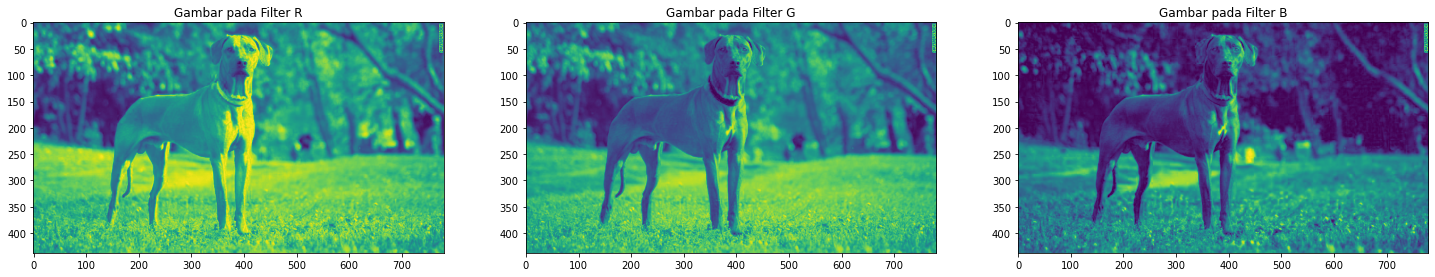

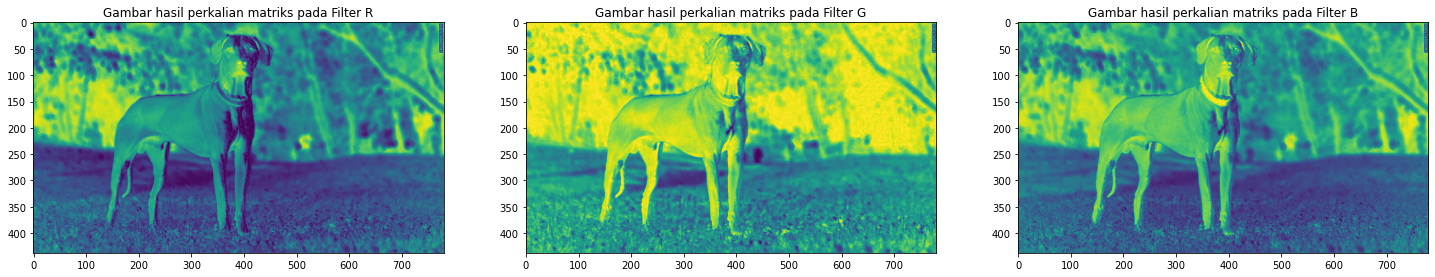

In [8]:
#Perkalian matriks -(1)*Identitas dengan tiap-tiap kanal warna
red_matrix = matrix1@gambar_red #matriks hasil perkalian kanal red
blue_matrix = matrix1@gambar_blue #matriks hasil perkalian kanal green
green_matrix = matrix1@gambar_green #matriks hasil perkalian kanal blue

#Tampilkan Gambar Asli
fig1, ax1 = plt.subplots(ncols=3,figsize=(25,10))
ax1[0].imshow(gambar_red)
ax1[0].set_title('Gambar pada Filter R')
ax1[1].imshow(gambar_green)
ax1[1].set_title('Gambar pada Filter G')
ax1[2].imshow(gambar_blue)
ax1[2].set_title('Gambar pada Filter B')

#Tampilkan Gambar
fig, ax = plt.subplots(ncols=3,figsize=(25,10))
ax[0].imshow(red_matrix)
ax[0].set_title('Gambar hasil perkalian matriks pada Filter R')
ax[1].imshow(blue_matrix)
ax[1].set_title('Gambar hasil perkalian matriks pada Filter G')
ax[2].imshow(green_matrix)
ax[2].set_title('Gambar hasil perkalian matriks pada Filter B')

#Tampung hasil perkalian dalam array
hasil = np.array([red_matrix.T, blue_matrix.T, green_matrix.T]) # array penampungan

Terlihat perbedaan antara gambar sebelum dilakukan perkalian matriks dan sesudah dilakukan perkalian matriks. Perkalian gambar dengan matriks -1*Identitas membuat daerah yang awalnya terang menjadi lebih gelap, begitu pula sebaliknya.

Cek dimensi array penampung hasil, pastikan dimensinya sudah sesuai dengan gambar aslinya. 

In [9]:
hasil.shape

(3, 780, 438)

In [10]:
hasil = hasil.T
hasil.shape

(438, 780, 3)

Apabila dimensi belum sesuai (438, 780, 3), lakukan transpose pada matriks perkalian dan array penampungan. Apabila sudah sesuai, hasil dapat ditampilkan

### Edge Detection Menggunakan Turunan Parsial

Algoritma proses Edge Detection dengan Turunan Parsial :
1. Lakukan turunan parsial terhadap sumbu x dan sumbu y menggunakan np.gradient(), simpan hasilnya dalam dx1 dan dy1.
2. Hitung nilai magnitude untuk tiap-tiap pixel dengan persamaan:
    - Magnitude = (dx1^2+dy1^2)^0.5
3. Lakukan seleksi magnitude pada pixel berdasarkan nilai threshold (diambil threshold 10,20,30). Apabila magnitude >= threshold nilai pada pixel di keep, apabila magnitude < threshold nilai pada pixel diganti 0. Untuk memudahkan proses ini gunakan np.where().
4. Proses Edge Detection dilakukan untuk tiap-tiap kanal warna. Di akhir, gabungkan ketiga kanal warna menjadi 1 gambar.

Bentuk setelah diappend (438, 780, 3)
Bentuk setelah diappend (438, 780, 3)
Bentuk setelah diappend (438, 780, 3)


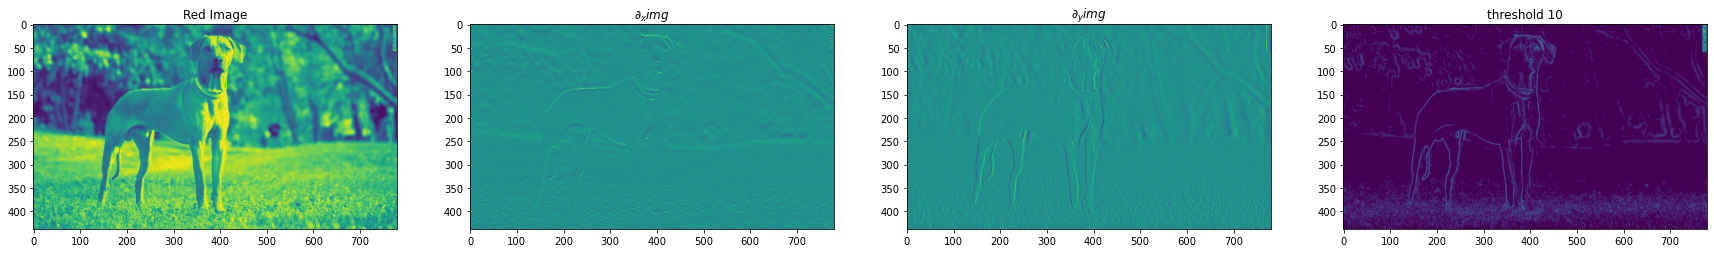

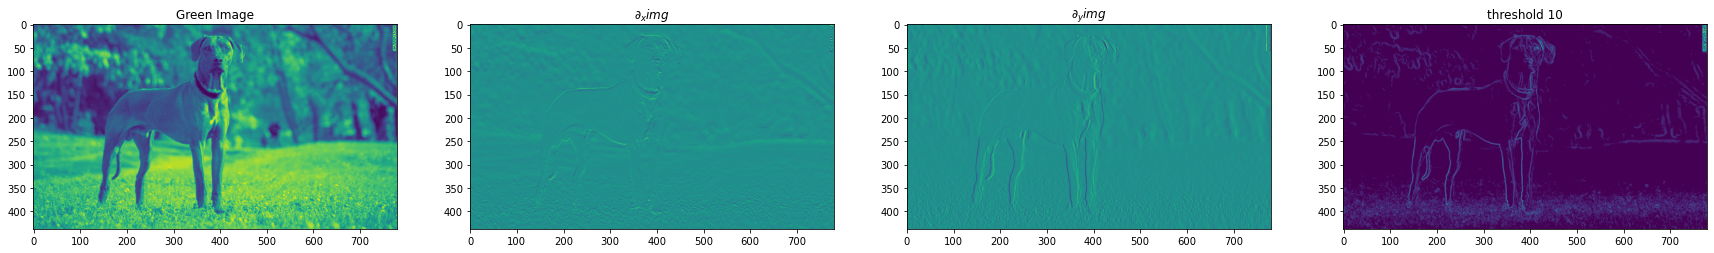

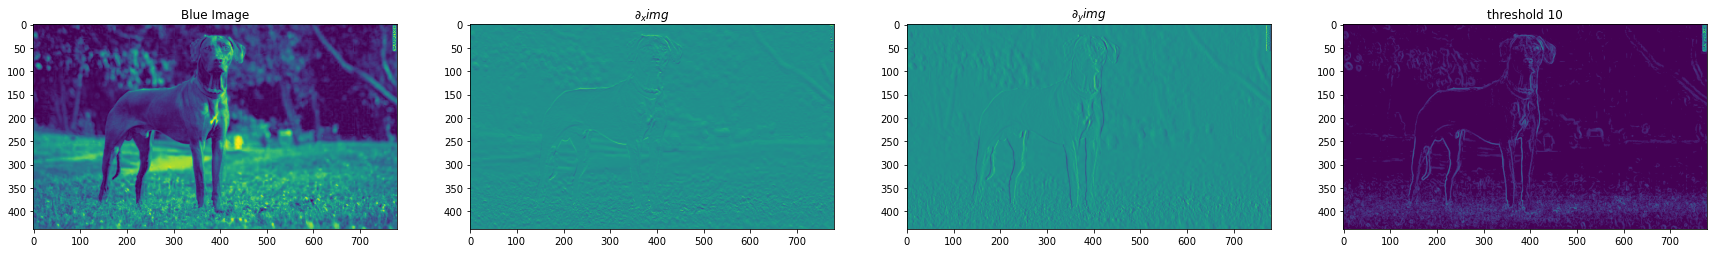

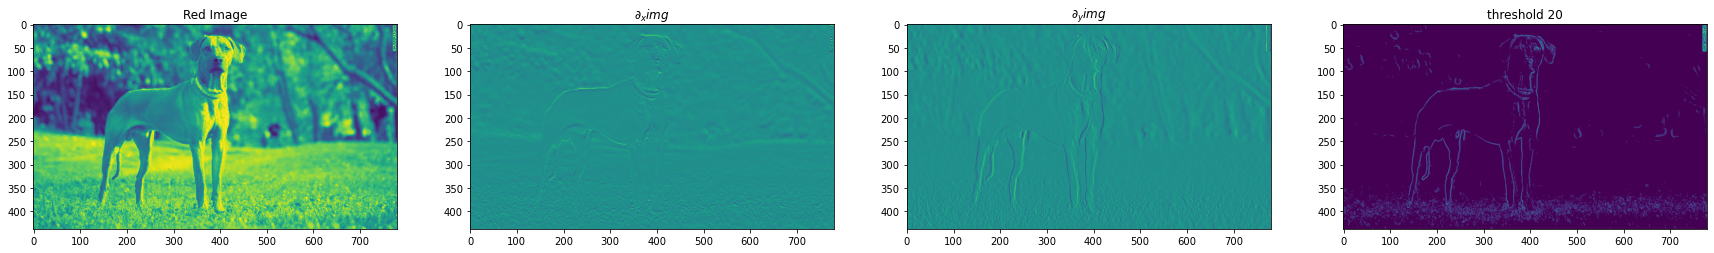

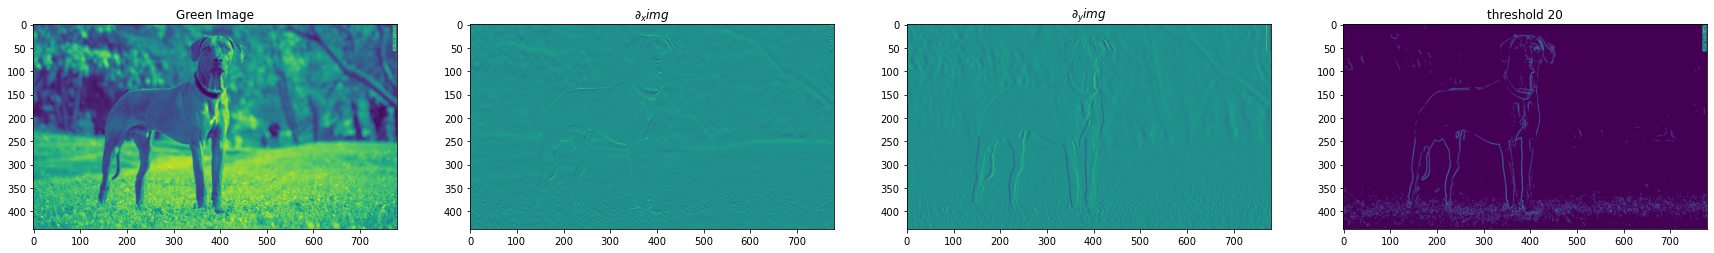

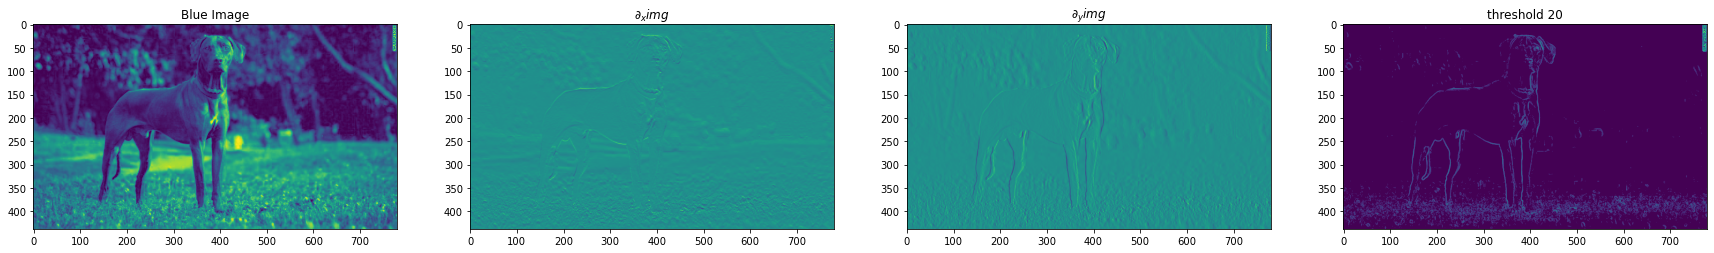

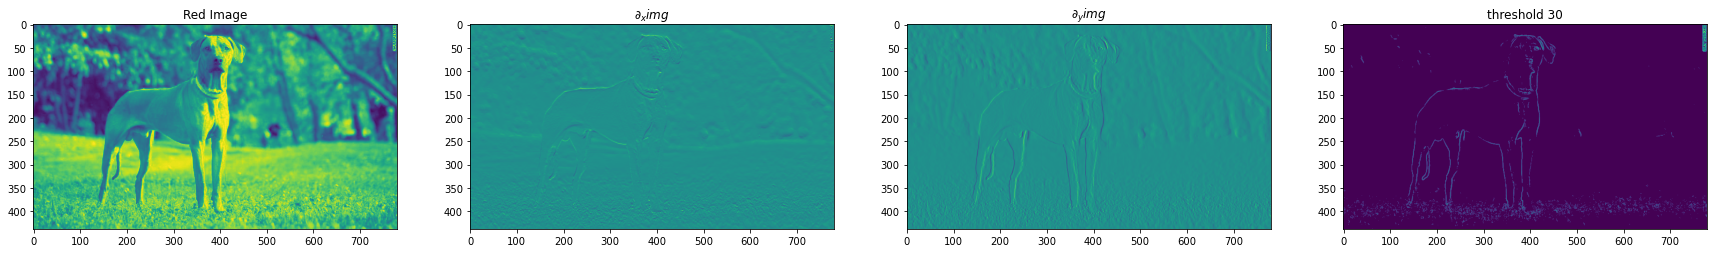

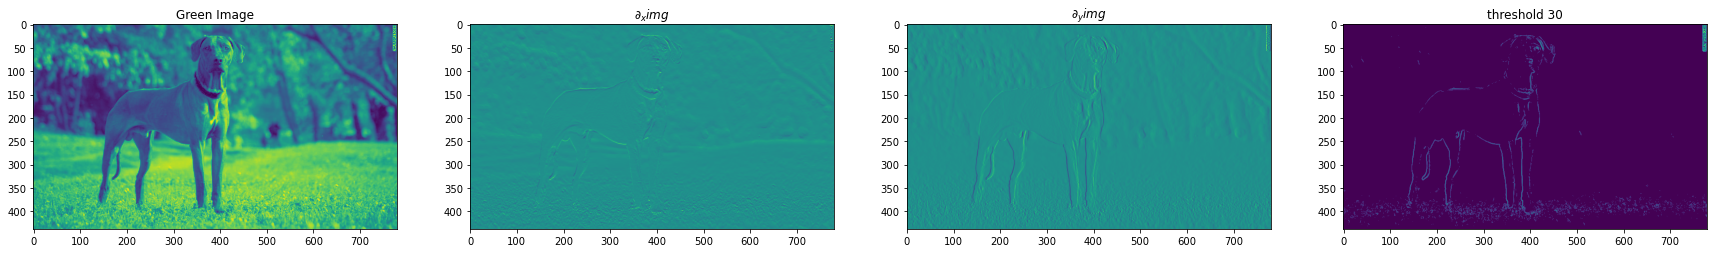

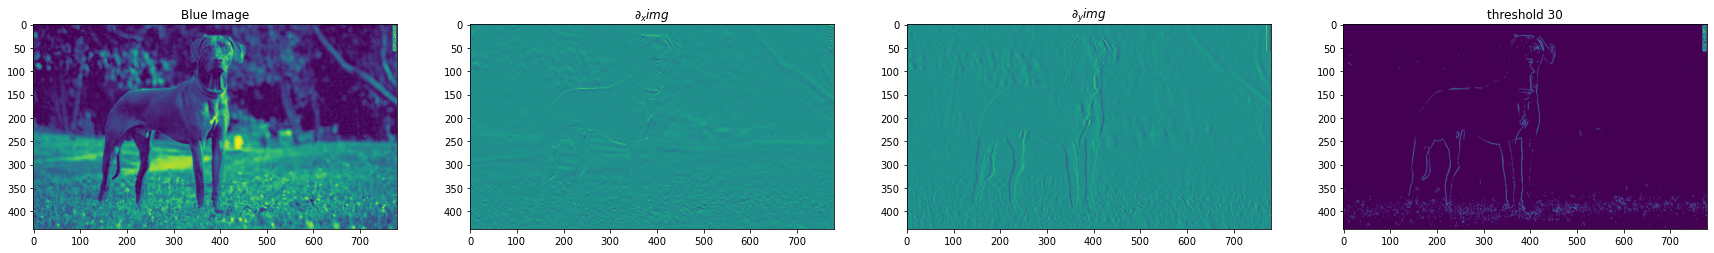

In [11]:
lst = []
for i in [10,20,30]:
  lst1 = []
  for color, channel in [('Red', gambar_red), ('Green', gambar_green), ('Blue', gambar_blue)]:
    #lakukan turunan parsial terhadap sumbu x (dx1) dan sumbu y (dy1)
    dx1, dy1 = np.gradient(channel) # 2-D array

    fig1, ax1 = plt.subplots(ncols=4,figsize=(30,5))

    #hitung magnitude = (dx1^2 + dy1^2)^0.5
    magnitude = (dx1**2+dy1**2)**0.5

    #lakukan seleksi, apabila nilai piksel>=angka threshold simpan, apabila kurang ganti menjadi 0
    threshold = np.where(magnitude>=i, magnitude, 0)
    #masukkan hasil untuk tiap-tiap kanal ke dalam list lst1
    lst1.append(threshold.T)

    #Lakukan visualisasi untuk gambar sebelum diproses, dx1, dy1 dan hasil thresholding
    ax1[0].imshow(channel)
    ax1[0].set_title(f'{color} Image')

    ax1[1].imshow(dx1)
    ax1[1].set_title(r'$\partial_x img$')

    ax1[2].imshow(dy1)
    ax1[2].set_title(r'$\partial_y img$')

    ax1[3].imshow(threshold)
    ax1[3].set_title(f'threshold {i}')
  
  lst1 = np.array(lst1)
  #masukkan hasil gabungan 3 kanal warna untuk tiap-tiap nilai threshold ke dalam list lst
  lst.append(lst1.T)
  print(f'Bentuk setelah diappend {lst1.T.shape}')
  

Pada hasil proses Edge Detection, garis tepi terlihat lebih jelas untuk proses dengan nilai threshold yang lebih kecil.

In [12]:
#Ubah list lst ke array
lst = np.array(lst)
#Cek bentuknya
lst.shape

(3, 438, 780, 3)

Bentuk array lst (array penampung semua hasil) adalah (3, 438, 780, 3), dimana (438, 780, 3) adalah dimensi dari gambar dengan 3 kanal warna. Lakukan slicing untuk hasil tiap-tiap nilai threshold.

In [13]:
#Slicing untuk hasil tiap-tiap nilai threshold
hasil_th_10 = lst[0,:,:,:]
print(f'Bentuk matriks hasil threshold=10 adalah {hasil_th_10.shape}.')

hasil_th_20 = lst[1,:,:,:]
print(f'Bentuk matriks hasil threshold=20 adalah {hasil_th_20.shape}.')

hasil_th_30 = lst[2,:,:,:]
print(f'Bentuk matriks hasil threshold=30 adalah {hasil_th_30.shape}.')

Bentuk matriks hasil threshold=10 adalah (438, 780, 3).
Bentuk matriks hasil threshold=20 adalah (438, 780, 3).
Bentuk matriks hasil threshold=30 adalah (438, 780, 3).


Bentuk matriks gambar hasil Edge Detection sudah sesuai, yaitu (438,780,3) sehingga siap untuk ditampilkan.

## Hasil dan Kesimpulan

### Hasil Perkalian Matriks -1*Identitas dengan Gambar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


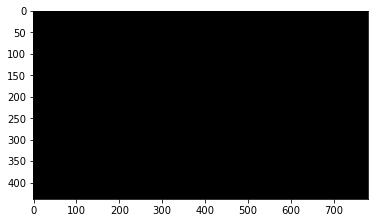

In [14]:
plt.imshow(hasil)

Didapatkan gambar hitam, hal ini dikarenakan perkalian dengan matrix -1*np.eye membuat tiap-tiap pixel bernilai minus pada setiap kanal warna. Pixel dengan nilai <= 0 untuk tiap-tiap kanal warna akan menghasilkan warna hitam.

### Hasil Edge Detection untuk Tiap-Tiap Threshold

#### Hasil gabungan 3 kanal warna untuk threshold=10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


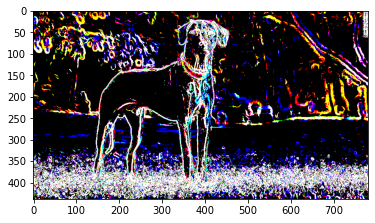

In [15]:
plt.imshow(hasil_th_10)

Didapatkan hasil dengan edge yang terlihat sangat jelas, dengan noise yang banyak.

#### Hasil gabungan 3 kanal warna untuk threshold=20

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


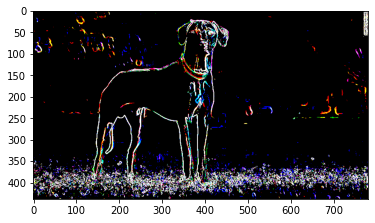

In [16]:
plt.imshow(hasil_th_20)

Didapatkan hasil dengan edge yang terlihat cukup jelas, dengan noise yang sedikit.

#### Hasil gabungan 3 kanal warna untuk threshold=30

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


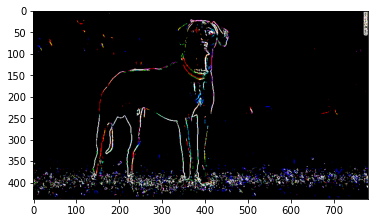

In [17]:
plt.imshow(hasil_th_30)

Didapatkan hasil dengan edge yang terlihat kurang jelas, dengan noise yang lebih sedikit dibanding hasil dengan threshold=20.

### Kesimpulan
```
Kesimpulan yang dapat diambil dari pengerjaan tugas ini adalah:

1. Hasil perkalian matriks -1*identitas dengan tiap-tiap kanal warna pada gambar, jika disatukan akan menghasilkan warna hitam. Hal ini dikarenakan pixel dengan nilai <= 0 pada semua kanal warna akan berwarna hitam, sedangkan pixel dengan value=255 untuk semua kanal warna akan berwarna putih.

2. Dari hasil Edge Detection yang dilakukan dengan threshold sebesar 10, 20, dan 30, didapatkan:
    a. Semakin besar threshold semakin sedikit noise-nya, semakin kecil threshold semakin banyak noise-nya.
    b. Semakin besar threshold semakin kurang jelas edge yang terdeteksi, semakin kecil threshold semakin jelas edge yang terdeteksi.
Hal ini dikarenakan semakin kecil nilai threshold, pixel dengan value yang lebih kecil tidak ikut tersaring sehingga ikut ditampilkan pada hasil akhir.
```  